In [4]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import ssl
import re
import urllib.request
import urllib.parse
import urllib.error
import requests
import json
import os

ImportError: No module named request

In [7]:
#Activity 9

#Check the SSL certificate and ignore errors
ctx = ssl.create_default_context()
print(type(ctx))
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

<class 'ssl.SSLContext'>


In [8]:
top100url = "https://www.gutenberg.org/browse/scores/top"
#Get html from website
resp = requests.get(top100url)

In [9]:
def status_check(r):
    if r.status_code == 200:
        print("Successful connection")
        return 1
    else:
        print("Connection failed")
        return -1

In [11]:
#Check on the status of our scraping 
status_check(resp)

Successful connection


1

In [13]:
#Decoding step
contents = resp.content.decode(resp.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [16]:
#Look for the links and then create a list of the links
linksList = []
for link in soup.find_all('a'):
    linksList.append(link.get('href'))

#print the list of links
for link in linksList:
    print(link)

/
/about/
/about/
/policy/collection_development.html
/about/contact_information.html
/about/background/
/policy/permission.html
/policy/privacy_policy.html
/policy/terms_of_use.html
/ebooks/
/ebooks/
/ebooks/bookshelf/
/browse/scores/top
/ebooks/offline_catalogs.html
/help/
/help/
/help/copyright.html
/help/errata.html
/help/file_formats.html
/help/faq.html
/policy/
/help/public_domain_ebook_submission.html
/help/submitting_your_own_work.html
/help/mobile.html
/attic/
/donate/
/donate/
#books-last1
#authors-last1
#books-last7
#authors-last7
#books-last30
#authors-last30
/ebooks/84
/ebooks/1342
/ebooks/1952
/ebooks/25344
/ebooks/2542
/ebooks/46
/ebooks/1250
/ebooks/11
/ebooks/5200
/ebooks/43
/ebooks/1080
/ebooks/16328
/ebooks/98
/ebooks/76
/ebooks/1661
/ebooks/844
/ebooks/23
/ebooks/2701
/ebooks/1232
/ebooks/205
/ebooks/160
/ebooks/345
/ebooks/74
/ebooks/41
/ebooks/42108
/ebooks/174
/ebooks/63645
/ebooks/1260
/ebooks/2852
/ebooks/2591
/ebooks/408
/ebooks/1400
/ebooks/3825
/ebooks/16
/e

In [18]:
#Create top 100 list
bookList = []
for i in range(19,119):
    link = linksList[i]
    link = link.strip()
    x = re.findall('[0-9]+', link)
    if len(x) == 1:
        bookList.append(int(x[0]))
print(bookList)

[1, 1, 7, 7, 30, 30, 84, 1342, 1952, 25344, 2542, 46, 1250, 11, 5200, 43, 1080, 16328, 98, 76, 1661, 844, 23, 2701, 1232, 205, 160, 345, 74, 41, 42108, 174, 63645, 1260, 2852, 2591, 408, 1400, 3825, 16, 219, 215, 1064, 120, 203, 42324, 1497, 209, 3207, 2500, 158, 1404, 38269, 2814, 514, 6130, 42884, 63644, 4300, 768, 63641, 63640, 113, 55, 63638, 58585, 45, 63648, 35899, 40074, 1727, 34901, 140, 2600, 15399, 27827, 36, 2554, 5740, 1184, 63642, 33900, 7370, 22381, 135, 20203, 996, 902, 28054, 730, 4363, 308]


In [19]:
#print the first 2000 characters of the soup
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2020-11-06197546
last 7 days1457040
last 30 days6165828



Top 100 EBooks yesterd

In [25]:
#ebook list
ebookList = []
idxStart = soup.text.splitlines().index('Top 100 EBooks yesterday')
for i in range(100):
    ebookList.append(soup.text.splitlines()[idxStart+2+i])
for book in ebookList:
    print(book)

Top 100 EBooks last 7 days
Top 100 Authors last 7 days
Top 100 EBooks last 30 days
Top 100 Authors last 30 days


Top 100 EBooks yesterday

Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2947)
Pride and Prejudice by Jane Austen (2474)
The Yellow Wallpaper by Charlotte Perkins Gilman (2033)
The Scarlet Letter by Nathaniel Hawthorne (1997)
Et dukkehjem. English by Henrik Ibsen (1285)
A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (1278)
Anthem by Ayn Rand (1177)
Alice's Adventures in Wonderland by Lewis Carroll (975)
Metamorphosis by Franz Kafka (930)
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (916)
A Modest Proposal by Jonathan Swift (895)
Beowulf: An Anglo-Saxon Epic Poem (893)
A Tale of Two Cities by Charles Dickens (825)
Adventures of Huckleberry Finn by Mark Twain (817)
The Adventures of Sherlock Holmes by Arthur Conan Doyle (817)
The Importance of Being Earnest: A Trivial Comedy for Serious People 

In [27]:
#pull names from the list of ebooks
cleanEbookList = []
for i in range(100):
    id1, id2 = re.match('^[a-zA-Z ]*', ebookList[i]).span()
    cleanEbookList.append(ebookList[i][id1:id2])
for book in cleanEbookList:
    print(book)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Scarlet Letter by Nathaniel Hawthorne 
Et dukkehjem
A Christmas Carol in Prose
Anthem by Ayn Rand 
Alice
Metamorphosis by Franz Kafka 
The Strange Case of Dr
A Modest Proposal by Jonathan Swift 
Beowulf
A Tale of Two Cities by Charles Dickens 
Adventures of Huckleberry Finn by Mark Twain 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Importance of Being Earnest
Narrative of the Life of Frederick Douglass
Moby Dick
Il Principe
Walden
The Awakening
Dracula by Bram Stoker 
The Adventures of Tom Sawyer by Mark Twain 
The Legend of Sleepy Hollow by Washington Irving 
The Slang Dictionary
The Picture of Dorian Gray by Oscar Wilde 
The Last Monster by Gardner F
Jane Eyre
The Hound of the Baskervilles by Arthur Conan Doyle 
Grimms
The Souls of Black Folk by W
Great Expectations by Charles Dickens 
Pygmalion by Bernard Shaw 
Peter Pan by J
Heart of Da

In [28]:
#Activity 10

In [38]:
#Store the API key in a JSON
with open('APIkey.json') as d:
    key = json.load(d)
    apiKey = key['key']

In [42]:
apiUrl = "http://www.omdbapi.com/?"
key = '&apikey=' + apiKey

In [44]:
#Display the json in a formatted way
def print_json(json):
    keyList = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
              'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for k in keyList:
        if k in list(json.keys()):
            print(f"{k}: {json[k]}")

In [47]:
#Get the movie poster
def poster(json):
    title = json["Title"]
    posterUrl = json["Poster"]
    poster_file_ext = posterUrl.split('.')[-1]
    posterData = urllib.request.urlopen(posterUrl).read()
    location = os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(location):
        os.mkdir(location)
    fileName = location+str(title)+'.'+poster_file_ext
    h = open(fileName, 'wb')
    h.write(posterData)
    h.close

In [58]:
def search_movie(title):
    try: 
        url = apiUrl + urllib.parse.urlencode({'t': str(title)}) + "&apikey=" + apiKey
        print('Getting movie data')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        jsonData = json.loads(data)
        if jsonData['Response']=='True':
            print_json(jsonData)
            if jsonData['Poster'] != 'N/A':
                poster(jsonData)
        else:
            print("Error at: {}".format(jsonData['Error']))
    except urllib.error.URLError as e:
        print('Error: {}'.format(e.reason))

In [59]:
search_movie("Titanic")

Getting movie data
http://www.omdbapi.com/?t=Titanic&apikey=70b9cf31
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico, Australia, Canada
Awards: Won 11 Oscars. Another 112 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,029,426
imdbID: tt0120338


In [60]:
search_movie("Random_Error")

Getting movie data
http://www.omdbapi.com/?t=Random_Error&apikey=70b9cf31
Error at: Movie not found!


In [61]:
#Titanic.jpg file exists on my machine!

In [106]:
#Exercise 3 : Connecting to twitter API


In [107]:
import tweepy

In [101]:
secrets = json.loads(open('twitterkeys.json').read())
apikey = secrets['Consumerkey']
apisecretkey = secrets['Consumerkeysecret']
accesskey = secrets['Accesstoken']
accesssecretkey = secrets['Accesstokensecret']

In [103]:
auth = tweepy.OAuthHandler(apikey, apisecretkey)
auth.set_access_token(accesskey, accesssecretkey)
api = tweepy.API(auth)

In [104]:
searchThings = api.search('Data Science')

In [105]:
print(searchThings)

[Status(_api=<tweepy.api.API object at 0x000002DB85774FD0>, _json={'created_at': 'Sun Nov 08 04:19:01 +0000 2020', 'id': 1325291711145316352, 'id_str': '1325291711145316352', 'text': 'RT @byLilyV: #FEATURED #COURSES\nThe #Data #Science Course 2020: Complete #DataScience Bootcamp\nIn demand skills: #Statistical #analysis\n#Py…', 'truncated': False, 'entities': {'hashtags': [{'text': 'FEATURED', 'indices': [13, 22]}, {'text': 'COURSES', 'indices': [23, 31]}, {'text': 'Data', 'indices': [36, 41]}, {'text': 'Science', 'indices': [42, 50]}, {'text': 'DataScience', 'indices': [73, 85]}, {'text': 'Statistical', 'indices': [113, 125]}, {'text': 'analysis', 'indices': [126, 135]}], 'symbols': [], 'user_mentions': [{'screen_name': 'byLilyV', 'name': "Lily's Education4you.online", 'id': 134434122, 'id_str': '134434122', 'indices': [3, 11]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://yoelijoserfeliz.com.mx" rel="nofollow">Pachamama_X<

In [2]:
#Exercise 4
import matplotlib.pyplot as plt

In [33]:
#Load english premier league table (pre-covid)
data = pd.read_csv("epl2020.csv", index_col = 0)
data.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [34]:
for col in data.columns:
    print(col)

h_a
xG
xGA
npxG
npxGA
deep
deep_allowed
scored
missed
xpts
result
date
wins
draws
loses
pts
npxGD
teamId
ppda_cal
allowed_ppda
matchtime
tot_points
round
tot_goal
tot_con
Referee.x
HS.x
HST.x
HF.x
HC.x
HY.x
HR.x
AS.x
AST.x
AF.x
AC.x
AY.x
AR.x
B365H.x
B365D.x
B365A.x
HtrgPerc
AtrgPerc
matchDay


In [73]:
#Filter for only the liverpool games
liverpoolResults = data[data['teamId'] == 'Liverpool'].reset_index(drop=True)
liverpoolResults.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,h,2.23456,0.842407,2.23456,0.842407,11,5,4,1,2.3863,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
1,a,1.52022,2.140470,1.52022,2.140470,6,1,2,1,0.9463,...,6,9,1,0,6.50,4.75,1.44,0.214286,0.400000,Sat
2,h,2.78821,0.985542,2.02704,0.985542,9,7,3,1,2.5205,...,5,4,1,0,1.50,4.60,6.00,0.200000,0.333333,Sat
3,a,1.20057,0.617390,1.20057,0.617390,11,0,3,0,1.8342,...,16,4,0,0,9.50,5.50,1.30,0.285714,0.466667,Sat
4,h,2.93281,0.291073,2.93281,0.291073,19,4,3,1,2.8820,...,4,1,0,0,1.14,8.50,17.00,0.428571,0.125000,Sat


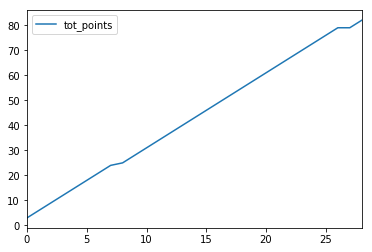

In [74]:
#line plot of the amount of points liverpool earned 
#against the matchday number
%matplotlib inline
liverpoolResults.plot(y='tot_points', use_index=True)

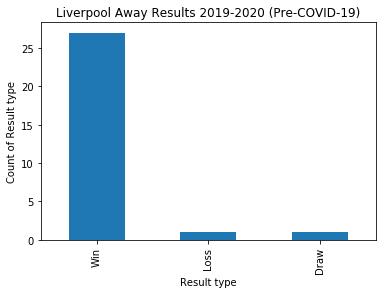

In [79]:
#Create bar chart of liverpool's results for the 2019-2020 season, before covid-19
liverpoolResults['result'] = liverpoolResults['result'].replace('l', 'Loss')
liverpoolResults['result'] = liverpoolResults['result'].replace('w', 'Win')
liverpoolResults['result'] = liverpoolResults['result'].replace('d', 'Draw')
ax = liverpoolResults['result'].value_counts().plot(kind='bar')
ax.set(xlabel="Result type", ylabel="Count of Result type", title='Liverpool Away Results 2019-2020 (Pre-COVID-19)')

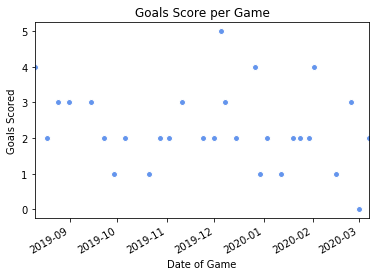

In [84]:
#Create scatterplot of goals scored per game
x = liverpoolResults['date']
y = liverpoolResults['scored']

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='CornflowerBlue', markeredgecolor='white')
fig.autofmt_xdate()
ax.set_xlim(min(liverpoolResults['date']), max(liverpoolResults['date']))
ax.set(ylabel='Goals Scored', xlabel='Date of Game', title='Goals Score per Game')